<a href="https://colab.research.google.com/github/Navya04Shah/Projects/blob/main/working%20on%20computer%20vision%20with%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Working on Computer Vision with Python

In [ ]:
!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O dt.jpg

# np = common abbreviation for numpy
import numpy as np


# Big takeaway: numpy docs are your friend! Look before you write!

--2024-06-22 05:42:05--  https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg
Resolving www.duckietown.org (www.duckietown.org)... 172.67.195.50, 104.21.92.144
Connecting to www.duckietown.org (www.duckietown.org)|172.67.195.50|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.duckietown.com/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg [following]
--2024-06-22 05:42:05--  https://www.duckietown.com/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg
Resolving www.duckietown.com (www.duckietown.com)... 172.67.205.80, 104.21.22.143, 2606:4700:3032::6815:168f, ...
Connecting to www.duckietown.com (www.duckietown.com)|172.67.205.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154909 (151K) [image/jpeg]
Saving to: ‘dt.jpg’

dt.jpg              100%[===================>] 151.28K  --.-KB/s    in 0.05s   

2024-06-22 05:42:05 (2.85 MB/s) - ‘dt.jpg’ saved [154909/154909

<class 'numpy.ndarray'>


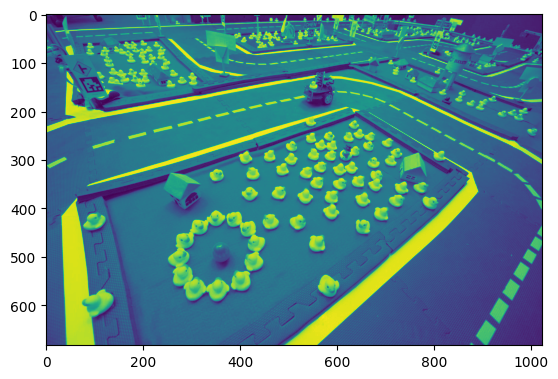

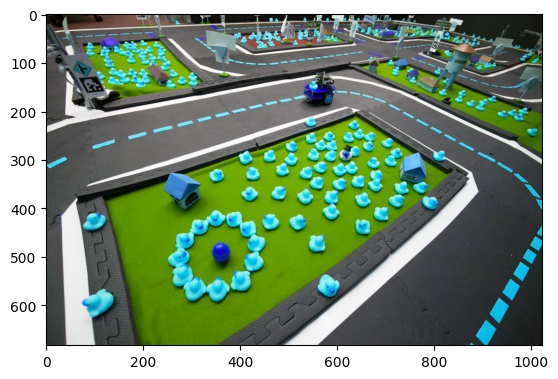

In [ ]:
#OpenCV library in python
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

# Load in Grayscale
img = cv2.imread('./dt.jpg', 0)

# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img)
plt.show()

img = cv2.imread('./dt.jpg')

plt.imshow(img)
plt.show()

# This would work normally, but it will crash the colab kernel, so don't.
# cv2.imshow('Image', img)

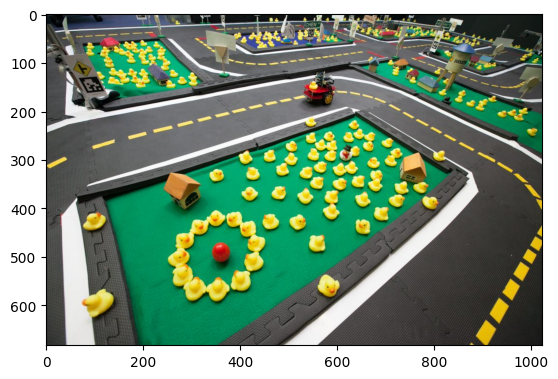

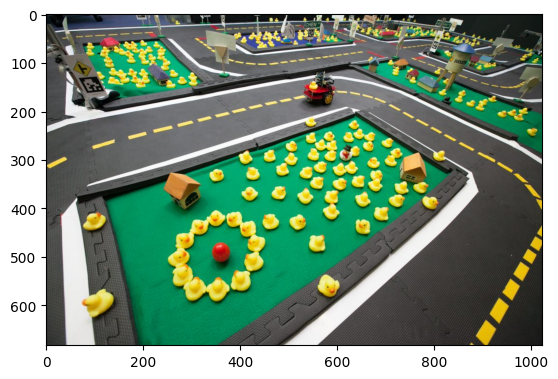

In [ ]:
#In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()

# Or, use fun numpy functions / indexing!
imgrgb = img[:,:,::-1]
plt.imshow(imgrgb)
plt.show()


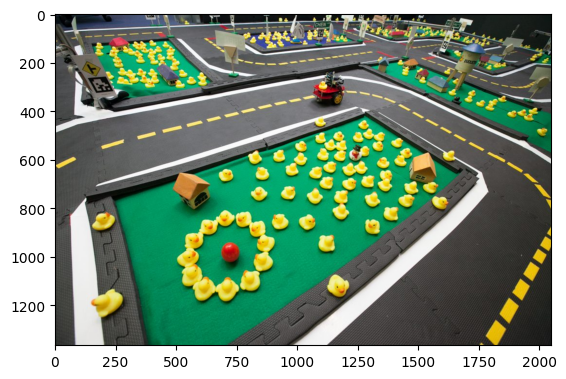

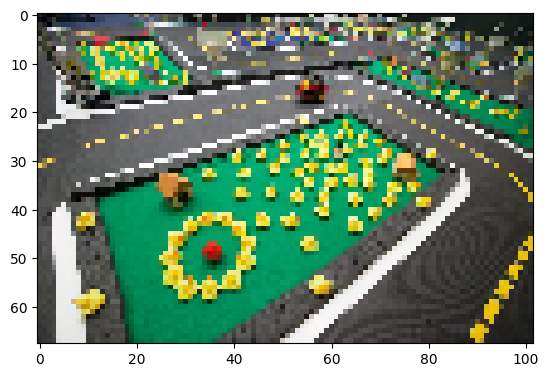

In [ ]:
#Common Image Manipulations
#OpenCV is super useful for doing lots of image transformations, and we will experiment with some of the basic ones below.
# Expanding
res = cv2.resize(imgrgb, None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# Shrinking
res = cv2.resize(imgrgb, None,fx=.1, fy=.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# What are some practical constraints that have to do with image resizing?

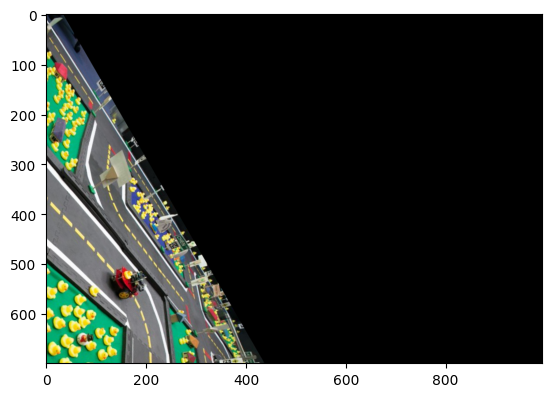

In [ ]:
#Transformation Parameters
#@title Transformation Parameters { run: "auto" }

theta_degrees = 60 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 16 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = -30 #@param {type:"slider", min:-100, max:100, step:2}

# We can also play around with rotations by defining our M matrix,
# which has the form:
"""
| cos(theta) -sin(theta) tx |
| sin(theta)  cos(theta) ty |
"""

rows, cols, _ = imgrgb.shape
radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x],
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(imgrgb, M, (cols,rows))

plt.imshow(res)
plt.show()

In [ ]:
#Advanced Image Manipulation Techniques


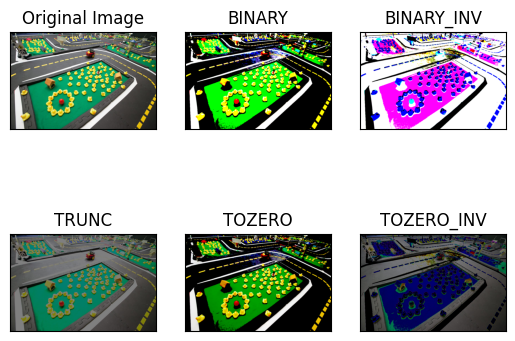

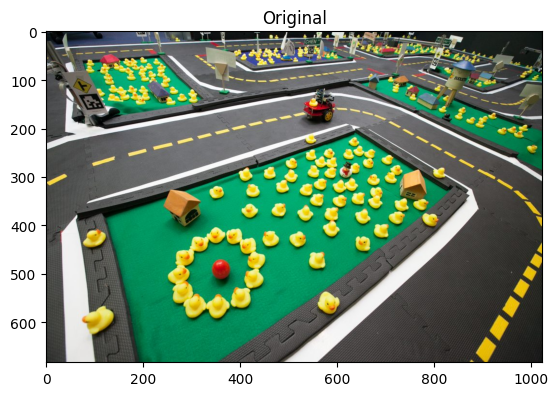

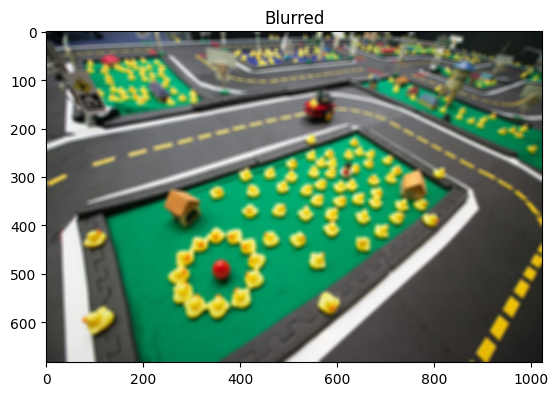

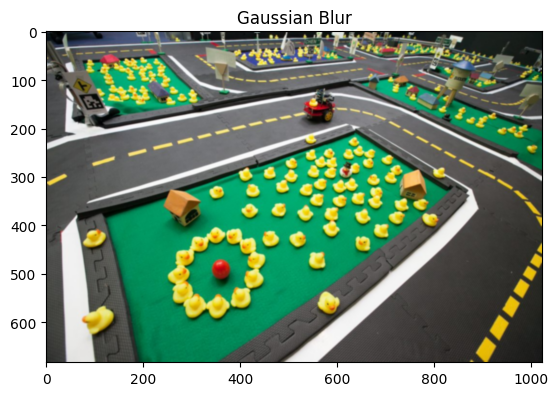

In [ ]:
# make things easier!
img = imgrgb

# Thresholding is cool
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Blurring - smoothes the image out
blur = cv2.blur(img,(10, 10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur),plt.title('Gaussian Blur')
plt.show()